<a href="https://colab.research.google.com/github/HariTarz/Netflix_Movies_And_TV_Shows_Clustering/blob/main/Netflix_Movies_And_TV_Shows_Clustering.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Problem Statement**

This dataset consists of tv shows and movies available on Netflix as of 2019. The dataset is collected from Flixable which is a third-party Netflix search engine.

In 2018, they released an interesting report which shows that the number of TV shows on Netflix has nearly tripled since 2010. The streaming service’s number of movies has decreased by more than 2,000 titles since 2010, while its number of TV shows has nearly tripled. It will be interesting to explore what all other insights can be obtained from the same dataset.

Integrating this dataset with other external datasets such as IMDB ratings, rotten tomatoes can also provide many interesting findings.

## <b>In this  project, you are required to do </b>
1. Exploratory Data Analysis 

2. Understanding what type content is available in different countries

3. Is Netflix has increasingly focusing on TV rather than movies in recent years.
4. Clustering similar content by matching text-based features



# **Attribute Information**

1. show_id : Unique ID for every Movie / Tv Show

2. type : Identifier - A Movie or TV Show

3. title : Title of the Movie / Tv Show

4. director : Director of the Movie

5. cast : Actors involved in the movie / show

6. country : Country where the movie / show was produced

7. date_added : Date it was added on Netflix

8. release_year : Actual Releaseyear of the movie / show

9. rating : TV Rating of the movie / show

10. duration : Total Duration - in minutes or number of seasons

11. listed_in : Genere

12. description: The Summary description

## Importing Dependencies

In [1]:
import numpy as np
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.simplefilter('ignore')
%matplotlib inline

In [2]:
colors= ['#000000', '#320510', '#720510', '#b20510', '#c20510', '#d50913','#e50913','#f50913', '#ff3333', '#ff5b5b', '#ff8a8a', '#ffc1c1' ,'#dbdbdb', '#f7f7f7']
nf_c_palette= sns.color_palette(colors, as_cmap=True)
sns.set_theme(style='whitegrid', palette= nf_c_palette)

## Data Summary

In [3]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [4]:
# Reading the data set .CSV file from the google drive.
path= '/content/drive/MyDrive/Colab Notebooks/AlmaBetter/Unsupervised ML/Netflix Movies and TV Shows Clustering/dat/'
netflix_df= pd.read_csv(path + 'NETFLIX MOVIES AND TV SHOWS CLUSTERING.csv')

In [5]:
# Viewing the data set for the first time.
# Viewing the first 5 rows.
netflix_df.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,TV Show,3%,NaN,"João Miguel, Bianca Comparato, Michel Gomes, R...",Brazil,"August 14, 2020",2020,TV-MA,4 Seasons,"International TV Shows, TV Dramas, TV Sci-Fi &...",In a future where the elite inhabit an island ...
1,s2,Movie,7:19,Jorge Michel Grau,"Demián Bichir, Héctor Bonilla, Oscar Serrano, ...",Mexico,"December 23, 2016",2016,TV-MA,93 min,"Dramas, International Movies",After a devastating earthquake hits Mexico Cit...
2,s3,Movie,23:59,Gilbert Chan,"Tedd Chan, Stella Chung, Henley Hii, Lawrence ...",Singapore,"December 20, 2018",2011,R,78 min,"Horror Movies, International Movies","When an army recruit is found dead, his fellow..."
3,s4,Movie,9,Shane Acker,"Elijah Wood, John C. Reilly, Jennifer Connelly...",United States,"November 16, 2017",2009,PG-13,80 min,"Action & Adventure, Independent Movies, Sci-Fi...","In a postapocalyptic world, rag-doll robots hi..."
4,s5,Movie,21,Robert Luketic,"Jim Sturgess, Kevin Spacey, Kate Bosworth, Aar...",United States,"January 1, 2020",2008,PG-13,123 min,Dramas,A brilliant group of students become card-coun...


In [6]:
# Viewing the last 5 rows.
netflix_df.tail()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
7782,s7783,Movie,Zozo,Josef Fares,"Imad Creidi, Antoinette Turk, Elias Gergi, Car...","Sweden, Czech Republic, United Kingdom, Denmar...","October 19, 2020",2005,TV-MA,99 min,"Dramas, International Movies",When Lebanon's Civil War deprives Zozo of his ...
7783,s7784,Movie,Zubaan,Mozez Singh,"Vicky Kaushal, Sarah-Jane Dias, Raaghav Chanan...",India,"March 2, 2019",2015,TV-14,111 min,"Dramas, International Movies, Music & Musicals",A scrappy but poor boy worms his way into a ty...
7784,s7785,Movie,Zulu Man in Japan,NaN,Nasty C,NaN,"September 25, 2020",2019,TV-MA,44 min,"Documentaries, International Movies, Music & M...","In this documentary, South African rapper Nast..."
7785,s7786,TV Show,Zumbo's Just Desserts,NaN,"Adriano Zumbo, Rachel Khoo",Australia,"October 31, 2020",2019,TV-PG,1 Season,"International TV Shows, Reality TV",Dessert wizard Adriano Zumbo looks for the nex...
7786,s7787,Movie,ZZ TOP: THAT LITTLE OL' BAND FROM TEXAS,Sam Dunn,NaN,"United Kingdom, Canada, United States","March 1, 2020",2019,TV-MA,90 min,"Documentaries, Music & Musicals",This documentary delves into the mystique behi...


In [7]:
# Viewing shape of the dataset.
netflix_df.shape

(7787, 12)

In [8]:
# Viewing index dtype and columns and memory usage.
netflix_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7787 entries, 0 to 7786
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   show_id       7787 non-null   object
 1   type          7787 non-null   object
 2   title         7787 non-null   object
 3   director      5398 non-null   object
 4   cast          7069 non-null   object
 5   country       7280 non-null   object
 6   date_added    7777 non-null   object
 7   release_year  7787 non-null   int64 
 8   rating        7780 non-null   object
 9   duration      7787 non-null   object
 10  listed_in     7787 non-null   object
 11  description   7787 non-null   object
dtypes: int64(1), object(11)
memory usage: 730.2+ KB


In [9]:
# Checking for null values.
netflix_df.isna().sum()

show_id            0
type               0
title              0
director        2389
cast             718
country          507
date_added        10
release_year       0
rating             7
duration           0
listed_in          0
description        0
dtype: int64

In [10]:
# Viewing the summary of the dataset
netflix_df.describe(include= 'all').T

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
show_id,7787,7787,s1,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN
type,7787,2,Movie,5377,NaN,NaN,NaN,NaN,NaN,NaN,NaN
title,7787,7787,3%,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN
director,5398,4049,"Raúl Campos, Jan Suter",18,NaN,NaN,NaN,NaN,NaN,NaN,NaN
cast,7069,6831,David Attenborough,18,NaN,NaN,NaN,NaN,NaN,NaN,NaN
country,7280,681,United States,2555,NaN,NaN,NaN,NaN,NaN,NaN,NaN
date_added,7777,1565,"January 1, 2020",118,NaN,NaN,NaN,NaN,NaN,NaN,NaN
release_year,7787.0,NaN,NaN,NaN,2013.93258,8.757395,1925.0,2013.0,2017.0,2018.0,2021.0
rating,7780,14,TV-MA,2863,NaN,NaN,NaN,NaN,NaN,NaN,NaN
duration,7787,216,1 Season,1608,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [11]:
# Checking for duplicate records
netflix_df.duplicated().sum()

0

## Data Cleaning

In [12]:
# Copying the actual data set to new variable
nf_df= netflix_df.copy()

In [13]:
# Checking the null value counts in 'director'
print("Number of null values in 'director':" , nf_df.director.isna().sum())
print("Percentage of null values in 'director': {:.2f}%".format(nf_df.director.isna().sum()*100/len(nf_df)))

Number of null values in 'director': 2389
Percentage of null values in 'director': 30.68%


In [14]:
# Replacing the missing values of 'director' column with the label 'Unknown'
nf_df.director.replace(np.nan, 'Unknown', inplace= True)

In [15]:
# Checking the null value counts in 'cast'
print("Number of null values in 'cast':" , nf_df.cast.isna().sum())
print("Percentage of null values in 'cast': {:.2f}%".format(nf_df.cast.isna().sum()*100/len(nf_df)))

Number of null values in 'cast': 718
Percentage of null values in 'cast': 9.22%


In [16]:
# Replacing the missing values of 'cast' column with the label 'Unknown'
nf_df.cast.replace(np.nan, 'Unknown', inplace= True)

In [17]:
# Checking the null value counts in 'country'
print("Number of null values in 'country':" , nf_df.country.isna().sum())
print("Percentage of null values in 'country': {:.2f}%".format(nf_df.country.isna().sum()*100/len(nf_df)))

Number of null values in 'country': 507
Percentage of null values in 'country': 6.51%


In [18]:
# Replacing the missing values of 'country' column with the label 'Unknown'
nf_df.country.replace(np.nan, 'Unknown', inplace= True)

In [19]:
# Formatting the 'date_added' column values
nf_df['date_added']= pd.to_datetime(nf_df.date_added)

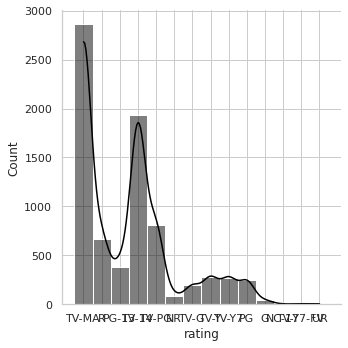

In [20]:
sns.displot(nf_df.rating, kde=True)

In [21]:
# Replacing the missing values of 'rating' column with the most frequent rating(mode).
nf_df.rating.fillna(nf_df.rating.mode()[0], inplace= True)

In [22]:
# Dropping the remaining null value columns
nf_df.dropna(inplace= True)

In [23]:
# Checking for null values
nf_df.isna().sum()

show_id         0
type            0
title           0
director        0
cast            0
country         0
date_added      0
release_year    0
rating          0
duration        0
listed_in       0
description     0
dtype: int64

In [24]:
# Viewing index dtype and columns and memory usage.
nf_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7777 entries, 0 to 7786
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   show_id       7777 non-null   object        
 1   type          7777 non-null   object        
 2   title         7777 non-null   object        
 3   director      7777 non-null   object        
 4   cast          7777 non-null   object        
 5   country       7777 non-null   object        
 6   date_added    7777 non-null   datetime64[ns]
 7   release_year  7777 non-null   int64         
 8   rating        7777 non-null   object        
 9   duration      7777 non-null   object        
 10  listed_in     7777 non-null   object        
 11  description   7777 non-null   object        
dtypes: datetime64[ns](1), int64(1), object(10)
memory usage: 789.9+ KB


## Exploratory Data Analysis

### Categorical Features

Text(0.5, 1.0, 'Ratings for different types of content in Netflix')

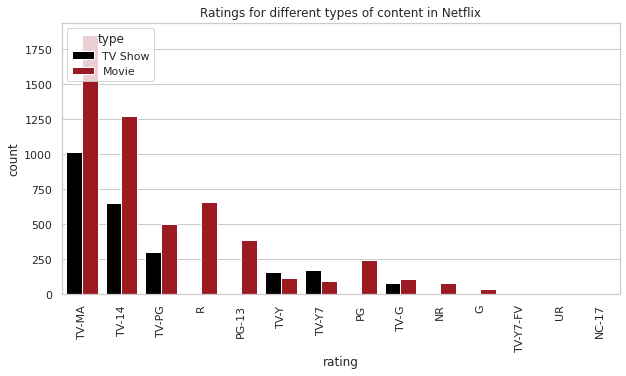

In [25]:
# Plotting different ratings for the different types of contents.
fig= plt.figure(figsize=(10,5))
sns.countplot(nf_df.rating, hue=nf_df.type, order= nf_df.rating.value_counts().index, palette= [colors[0], colors[3]])
plt.xticks(rotation=90)
plt.title('Ratings for different types of content in Netflix')

In [26]:
# Endcoding different ratings based on the age categories.
rating_dict= {'TV-Y': 'Kids', 'TV-Y7': 'Kids', 'TV-Y7-FV': 'Kids', 'G': 'Kids', 'TV-G': 'Kids', 'PG': 'Kids', 'TV-PG': 'Kids', 'PG-13': 'Teens', 'TV-14': 'Teens', 'R': 'Adults', 'TV-MA': 'Adults', 'NC-17': 'Adults', 'NR': 'Adults', 'UR': 'Adults'}
nf_df['modified_rating']= nf_df.rating.map(rating_dict)

Text(0.5, 1.0, 'Counts of different types of Netflix content types')

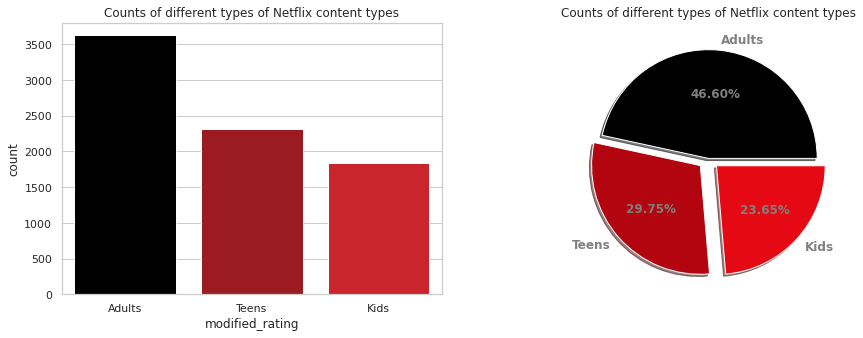

In [27]:
# Plotting different types of conents available in Netflix.
fig, ax = plt.subplots(1,2, figsize=(15,5))
sns.countplot(nf_df.modified_rating, ax=ax[0], palette= [colors[0], colors[3], colors[6]])
ax[0].set_title('Counts of different types of Netflix content types')
ax[1].pie(nf_df.modified_rating.value_counts(), labels = nf_df.modified_rating.value_counts().index, autopct='%1.2f%%', textprops={'color':'gray', 'fontsize':12, 'weight':'bold'}, colors=[colors[0], colors[3], colors[6]], explode = [0,0.1,0.1], shadow = True)
ax[1].set_title('Counts of different types of Netflix content types')
# sns.countplot(mod_nf_rating_df, ax=ax[2], hue=nf_df.type, palette= ['grey', colors[12]])
# ax[2].set_title('Counts of different types of Netflix content types')

**Observations:**
* 
*

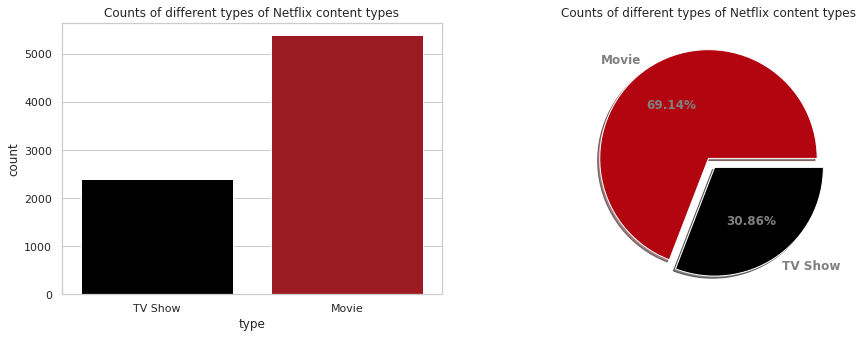

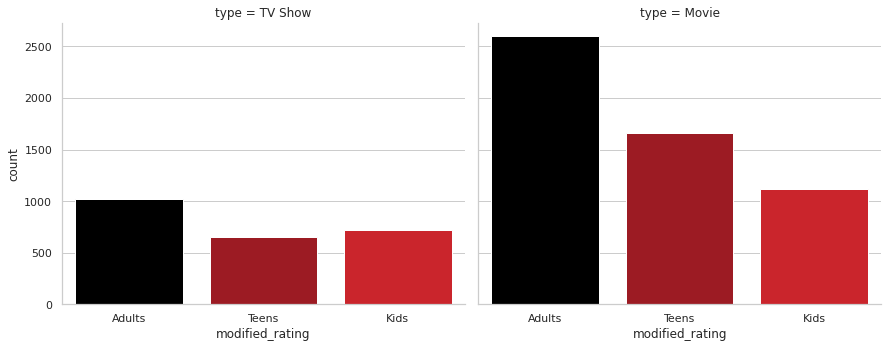

In [28]:
# Plotting different types of conents available in Netflix.
fig, ax = plt.subplots(1,2, figsize=(15,5))
sns.countplot(nf_df.type, ax=ax[0], palette= [colors[0], colors[3]])
ax[0].set_title('Counts of different types of Netflix content types')
ax[1].pie(nf_df.type.value_counts(), labels = nf_df.type.value_counts().index, autopct='%1.2f%%', textprops={'color':'gray', 'fontsize':12, 'weight':'bold'}, colors=[colors[3], colors[0]], explode = [0,0.1], shadow = True)
ax[1].set_title('Counts of different types of Netflix content types')
sns.catplot(x='modified_rating',col='type', data=nf_df, kind='count', palette= [colors[0], colors[3], colors[6]], aspect= 1.25)

**Observations:**
* 
*

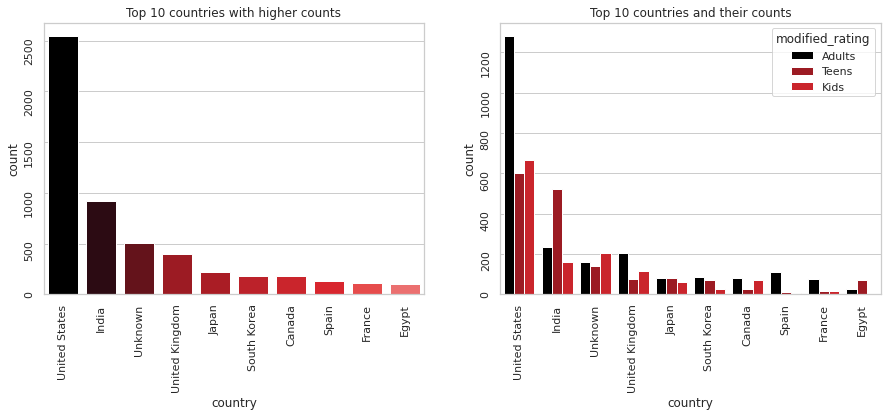

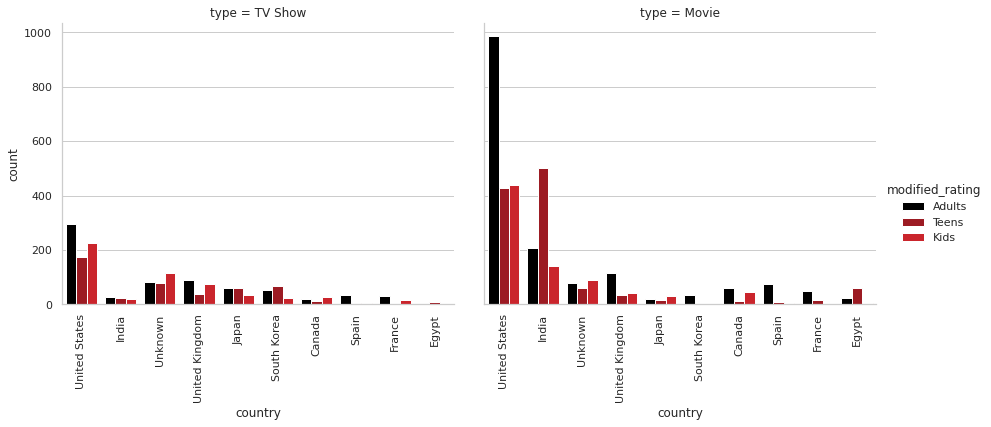

In [29]:
# Plotting the contents' count based top countries.
fig, ax = plt.subplots(1,2, figsize=(15,5))
sns.countplot(nf_df.country, order= nf_df.country.value_counts().index[:10], ax= ax[0])
ax[0].tick_params(rotation=90)
ax[0].set_title('Top 10 countries with higher counts')
sns.countplot(nf_df.country, hue=nf_df.modified_rating, order= nf_df.country.value_counts().index[:10], palette= [colors[0], colors[3], colors[6]], ax= ax[1])
ax[1].tick_params(rotation=90)
ax[1].set_title('Top 10 countries and their counts')
p = sns.catplot(x='country',hue='modified_rating', col='type', data=nf_df, kind='count',order= nf_df.country.value_counts().index[:10], palette= [colors[0], colors[3], colors[6]], aspect= 1.25)
p.set_xticklabels(rotation=90)

**Observations:**
* 
*

In [30]:
# Extracting the added year from the added date
nf_df['added_year']= nf_df.date_added.dt.year

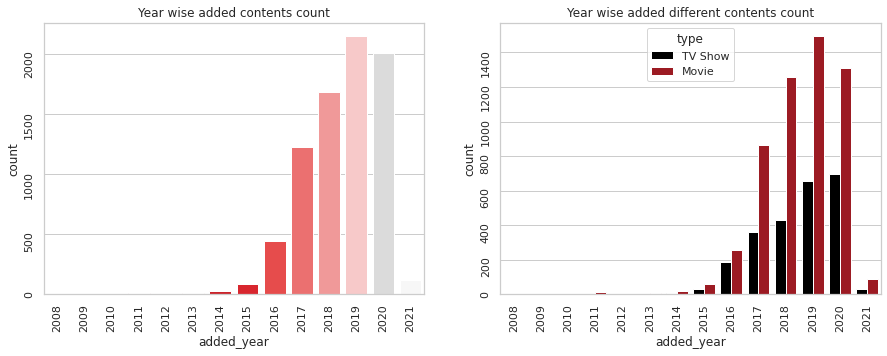

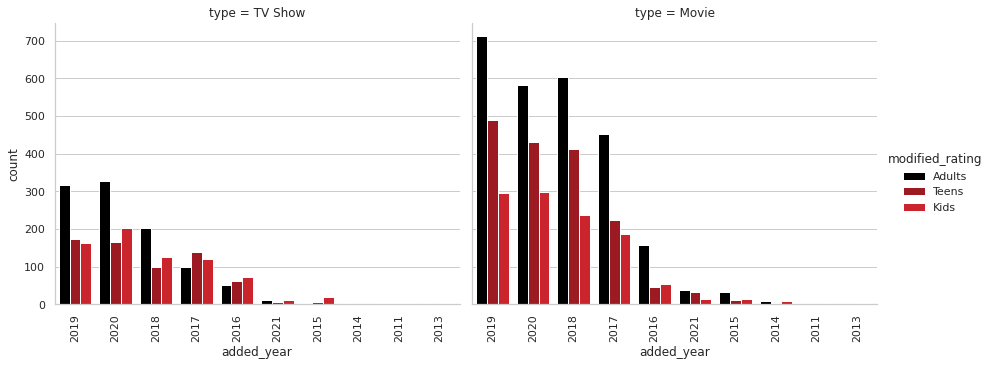

In [31]:
# Plotting added year for different available contents.
fig, ax = plt.subplots(1,2, figsize=(15,5))
sns.countplot(nf_df.date_added.dt.year, ax= ax[0])
ax[0].tick_params(rotation=90)
ax[0].set_title('Year wise added contents count')
ax[0].set_xlabel('added_year')
sns.countplot(nf_df.date_added.dt.year, hue=nf_df.type, palette= [colors[0], colors[3]], ax= ax[1])
ax[1].tick_params(rotation=90)
ax[1].set_title('Year wise added different contents count')
ax[1].set_xlabel('added_year')
p = sns.catplot(x='added_year', hue='modified_rating', col='type', data=nf_df, kind='count',order= nf_df.added_year.value_counts().index[:10], palette= [colors[0], colors[3], colors[6]], aspect= 1.25)
p.set_xticklabels(rotation=90)

In [32]:
# Extracting the added year from the added date
nf_df['added_month']= nf_df.date_added.dt.month
months= ['January', 'Febrary', 'March', 'April', 'May', 'June', 'July', 'August', 'september', 'October', 'November', 'December']

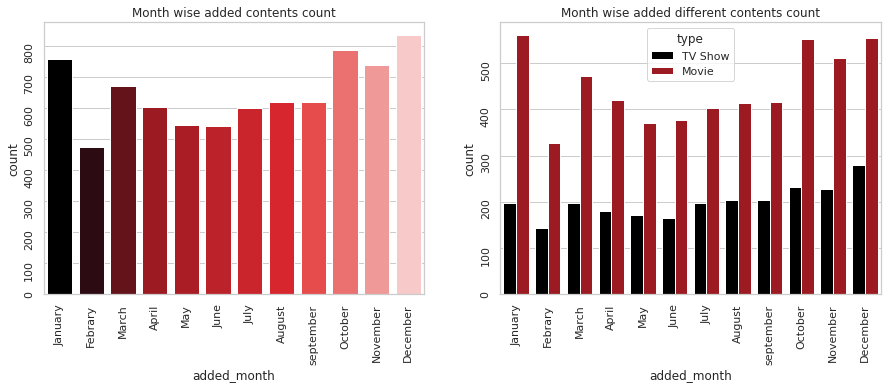

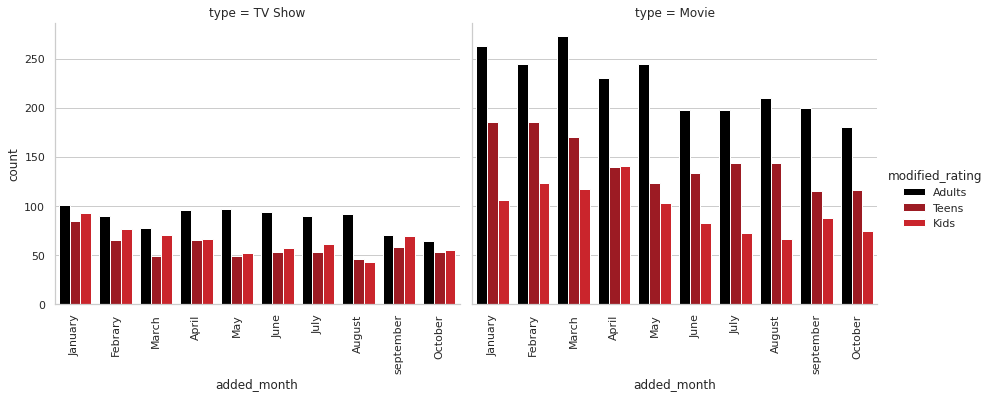

In [55]:
# Plotting added month for different available contents.
fig, ax = plt.subplots(1,2, figsize=(15,5))
sns.countplot(nf_df.added_month, ax= ax[0])
ax[0].tick_params(rotation=90)
ax[0].set_xticklabels(months)
ax[0].set_title('Month wise added contents count')
ax[0].set_xlabel('added_month')
sns.countplot(nf_df.added_month, hue=nf_df.type, palette= [colors[0], colors[3]], ax= ax[1])
ax[1].tick_params(rotation=90)
ax[1].set_xticklabels(months)
ax[1].set_title('Month wise added different contents count')
ax[1].set_xlabel('added_month')
p = sns.catplot(x='added_month', hue='modified_rating', col='type', data=nf_df, kind='count',order= nf_df.added_month.value_counts().index[:10], palette= [colors[0], colors[3], colors[6]], aspect= 1.25)
p.set_xticklabels(labels= months, rotation=90)